In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
#import glob

In [2]:
#Load the COSMOS shape catalog (this is the full catalog, both bright and faint)
#redshift_distribution = np.load("/Users/jw/Documents/cGAN_project_1/rcGAN/cosmos/nz_full.npy", allow_pickle=True)
redshift_distribution = np.load("/Users/jw/Documents/cGAN_project_1/rcGAN/cosmos/hist_n_z.npy", allow_pickle=True)
#TODO: Is .item needed?

In [3]:
redshift_distribution.shape

(550,)

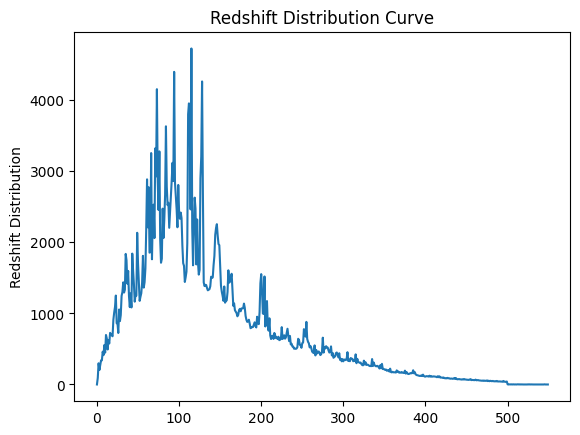

In [4]:
plt.plot(redshift_distribution)
plt.ylabel('Redshift Distribution')
plt.title('Redshift Distribution Curve')
plt.show()

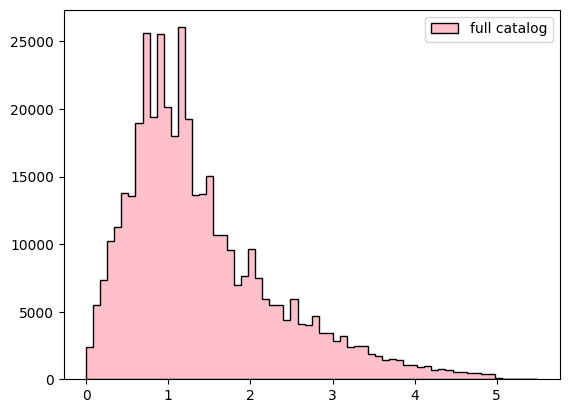

In [5]:
z = np.arange(0, 5.5, .01)
plt.hist(z, weights=redshift_distribution, bins=64, color="pink", alpha=1, ec="k", histtype='stepfilled',
     label='full catalog');
plt.legend()

In [6]:
redshift_vals = [0, 
                 0.034, 0.070, 0.105, 0.142, 0.179,
                 0.216, 0.255, 0.294, 0.335, 0.376,
                 0.418, 0.462, 0.506, 0.552, 0.599,
                 0.648, 0.698, 0.749, 0.803, 0.858,
                 0.914, 0.973, 1.034, 1.097, 1.163,
                 1.231, 1.302, 1.375, 1.452, 1.532,
                 1.615, 1.703, 1.794, 1.889, 1.989,
                 2.094, 2.203, 2.319, 2.440, 2.568]


redshift_vals_array = np.array(redshift_vals)

In [7]:
#Normalise p(z):
redshift_distribution = redshift_distribution/np.sum(redshift_distribution)
#Shape (550,)

In [8]:
source_dir = "/Users/jw/Documents/LP006/run001/" 
#Eventually want to iterate over source directories
file_prefix = "kappa"
file_extension = ".dat"

# List all files in the folder
files = os.listdir(source_dir)

required_files = [file for file in files if file.startswith(file_prefix) and file.endswith(file_extension)]

def get_file_number(file_name):
    return int(file_name[len(file_prefix):-len(file_extension)])

#The files are now ordered in ascending redshift.
sorted_files = sorted(required_files, key=get_file_number)

In [9]:
img_num = 0
kappa_tot = np.zeros((1024, 1024))
for fname in sorted_files:
    full_path = os.path.join(source_dir, fname)

    if not os.path.exists(full_path):
        print(f'The file at {full_path} does not exist.')
    else:
        with open(full_path, 'rb') as f:
            # Load file
            print(f"loading {fname}...")
            dummy = np.fromfile(f, dtype="int32", count=1)
            kappa = np.fromfile(f, dtype="float", count=1024*1024)
            dummy = np.fromfile(f, dtype="int32", count=1)  

            kappa = kappa.reshape((1024, 1024))

            #Bin size halved for first and last(?)
            if img_num == 0:
                x = redshift_vals_array[img_num + 1] - redshift_vals_array[img_num]
                delta_z = redshift_vals_array[img_num + 1] - redshift_vals_array[img_num]
                delta_z_rounded = round(delta_z, 3)
           
            elif img_num == 40:
                x = redshift_vals_array[img_num] - redshift_vals_array[img_num - 1]
                delta_z = redshift_vals_array[img_num] - redshift_vals_array[img_num - 1]
                delta_z_rounded = round(delta_z, 3)

            else:
                x = redshift_vals_array[img_num + 1] - redshift_vals_array[img_num - 1]
                delta_z = redshift_vals_array[img_num + 1] - redshift_vals_array[img_num - 1]
                delta_z_rounded = round(delta_z, 3)

            # print(delta_z_rounded)
            # print('z_i = ',redshift_vals_array[img_num])

            omega = redshift_distribution[img_num] * delta_z
            print(f"Integral Value: {omega}")

            kappa_tot += omega * kappa
            print(kappa_tot)
            
            img_num +=1

loading kappa00.dat...
Integral Value: 0.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
loading kappa01.dat...
Integral Value: 1.5317207666029723e-05
[[ 3.12966818e-09  2.99604401e-09  2.86241984e-09 ... -1.20363079e-09
  -1.19114970e-09 -1.17866860e-09]
 [ 3.05677021e-09  2.93906878e-09  2.82136736e-09 ... -1.20844541e-09
  -1.19721927e-09 -1.18599313e-09]
 [ 2.98387223e-09  2.88209355e-09  2.78031488e-09 ... -1.21326002e-09
  -1.20328884e-09 -1.19331766e-09]
 ...
 [-1.56271626e-09 -1.56371350e-09 -1.56471075e-09 ... -1.35317415e-09
  -1.35835529e-09 -1.36353643e-09]
 [-1.56343865e-09 -1.56451056e-09 -1.56558247e-09 ... -1.35180836e-09
  -1.35712797e-09 -1.36244757e-09]
 [-1.56416103e-09 -1.56530761e-09 -1.56645419e-09 ... -1.35044257e-09
  -1.35590064e-09 -1.36135872e-09]]
loading kappa02.dat...
Integral Value: 5.04936862266528e-05
[[ 1.34305215e-08  1.24238114e-08  1.141718

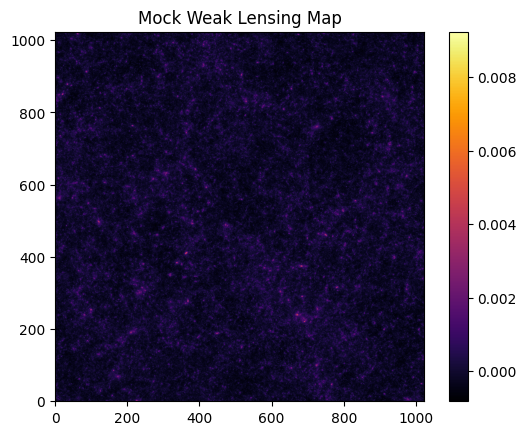

In [10]:
plt.imshow(kappa_tot, cmap = "inferno", origin="lower")
plt.colorbar()
plt.title("Mock Weak Lensing Map")
plt.show()